In [1]:
import ingestion
import people_library
import retrieval
import os
import pickle
import matplotlib.pyplot as plt
import math
import utils

/Users/adityapatil/GitHub/image-search/venvGlimpse/lib/python3.12/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Data Ingestion

In [ ]:
plist = ingestion.__main__()

In [16]:
# Name  and write faces here
people = people_library.PeopleLibrary()
people.rename_face(plist[0]['label'], 'Aditya')
people.rename_face(plist[1]['label'], 'Shruti')
people.rename_face(plist[2]['label'], 'Namita')
people.rename_face(plist[3]['label'], 'Jinay')
people.rename_face(plist[4]['label'], 'Yash')
people.rename_face(plist[5]['label'], 'Yash')
people.rename_face(plist[6]['label'], 'Punjabi')
people.rename_face(plist[7]['label'], 'Pratik')
people.rename_face(plist[15]['label'], 'Dhruv')
people.rename_face(plist[11]['label'], 'Aishwarya')
people.rename_face(plist[12]['label'], 'Sayali')
people.rename_face(plist[19]['label'], 'Shubham')

# adding names to faces
people.write_out()


## Search

Starting Duckling server on port 8010...
Duckling server ready in 0.0 seconds
Total Datetime Matches Found: 128
Duckling indices: {dtime_indices}
[23 42 47 57 14 12  3  5 11 89]


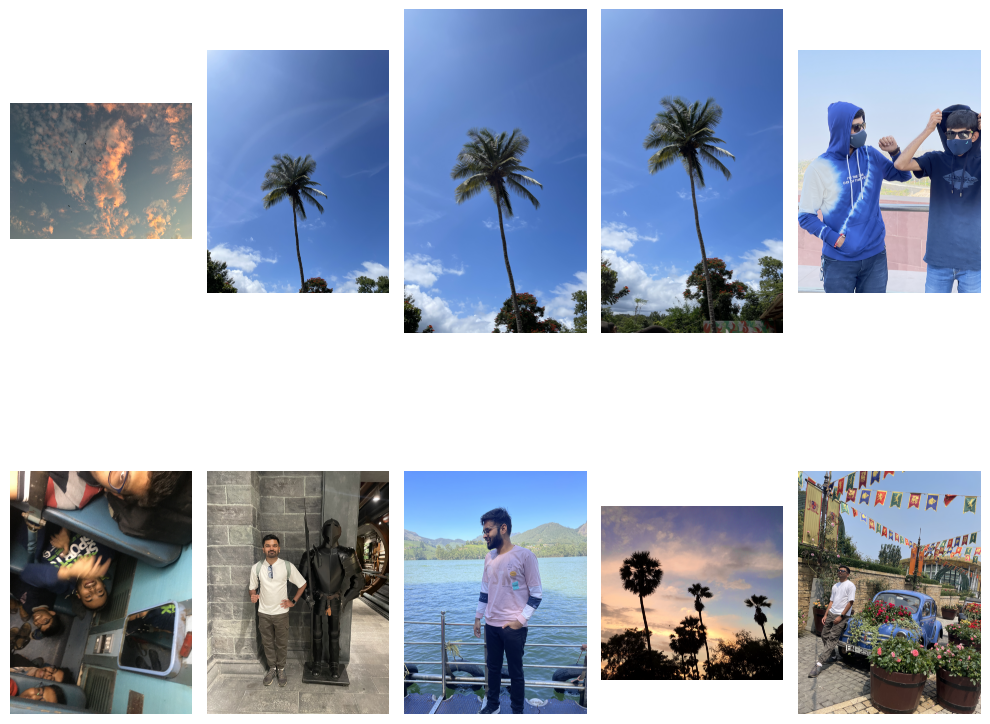

In [8]:
# Retrieval and plot

img_indices = retrieval.__main__(query="April 2025")
print(img_indices)

embed_dir = 'embed_store'
img_path_index = pickle.load(open(os.path.join(embed_dir, 'img_path_index.pkl'), 'rb'))

filtered_images = [img_path_index[idx] for idx in img_indices if idx != -1]

# print(filtered_images)
# display
num_images = len(filtered_images)
rows = math.ceil(num_images / 5)

fig, axes = plt.subplots(rows, 5, figsize=(10, 5 * rows))
if rows == 1:
    axes = [axes] # Handle the case where there's only one row

for i, img_path in enumerate(filtered_images):
    row = i // 5
    col = i % 5
    img = utils.get_and_orient_image(img_path)
    axes[row][col].imshow(img)
    axes[row][col].axis('off')

# Hide any unused subplots in the last row
if num_images % 5 != 0:
    num_empty = 5 - (num_images % 5)
    for i in range(num_empty):
        fig.delaxes(axes[-1][-1 - i])

plt.tight_layout()
plt.show()